MovieLens Ratings Analysis

Introduction

In [ ]:

MovieLens Ratings Analysis with Python
In this project, the MovieLens ml-latest-small dataset is explored using NumPy, Pandas, and Seaborn.the goal is to understand
which movies and genres receive the highest ratings and how user rating activity changes over time.

Data set

In [ ]:

The MovieLens ml-latest-small dataset contains 100,000 ratings from 610 users for 9,742 movies. The project mainly uses movies.csv
 (movieId, title, genres) and ratings.csv (userId, movieId, rating, timestamp), merged on movieId

imported libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

In [ ]:
loadind the data set

In [4]:
movies=pd.read_csv("/content/movies.csv")
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [5]:

ratings=pd.read_csv("/content/ratings.csv")
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [6]:
movies.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [8]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


Data cleaning


In [10]:
ratings.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0


In [11]:
#check duplicates
ratings.duplicated().sum()

np.int64(0)

analysis

In [14]:
# Prepare data for analysis
data=ratings.merge(movies,on="movieId")
data

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


In [ ]:
#adding year from title many of the titles are toy story(1995)

In [15]:
data["year"] = data["title"].str.extract(r"\((\d{4})\)").astype("float")


In [16]:
#checking it worked or not
data[["title","year"]].head()

,title,year
0,Toy Story (1995),1995.0
1,Grumpier Old Men (1995),1995.0
2,Heat (1995),1995.0
3,Seven (a.k.a. Se7en) (1995),1995.0
4,"Usual Suspects, The (1995)",1995.0


In [17]:
# 1) check original timestamp
data["timestamp"].head()

# 2) convert to datetime
data["timestamp"] = pd.to_datetime(data["timestamp"], unit="s")

# 3) create rating_year
data["rating_year"] = data["timestamp"].dt.year

# 4) verify
data[["timestamp", "rating_year"]].head()


,timestamp,rating_year
0,2000-07-30 18:45:03,2000
1,2000-07-30 18:20:47,2000
2,2000-07-30 18:37:04,2000
3,2000-07-30 19:03:35,2000
4,2000-07-30 18:48:51,2000


1.overall rating distribution

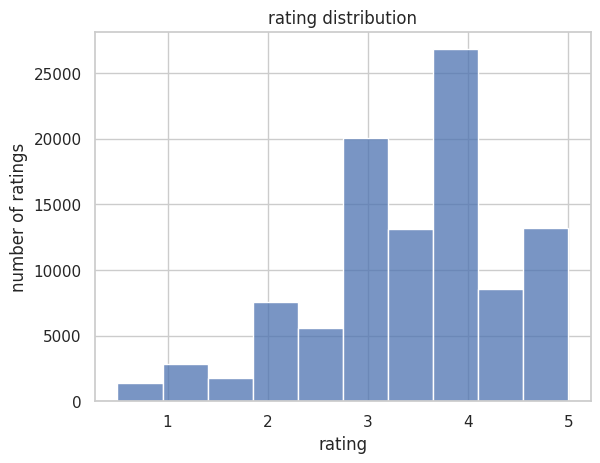

In [19]:
sns.histplot(data["rating"],bins=10,kde=False)
plt.title("rating distribution")
plt.xlabel("rating")
plt.ylabel("number of ratings")
plt.show()

2.Top 10 movies by average rating(at least 50 ratings)

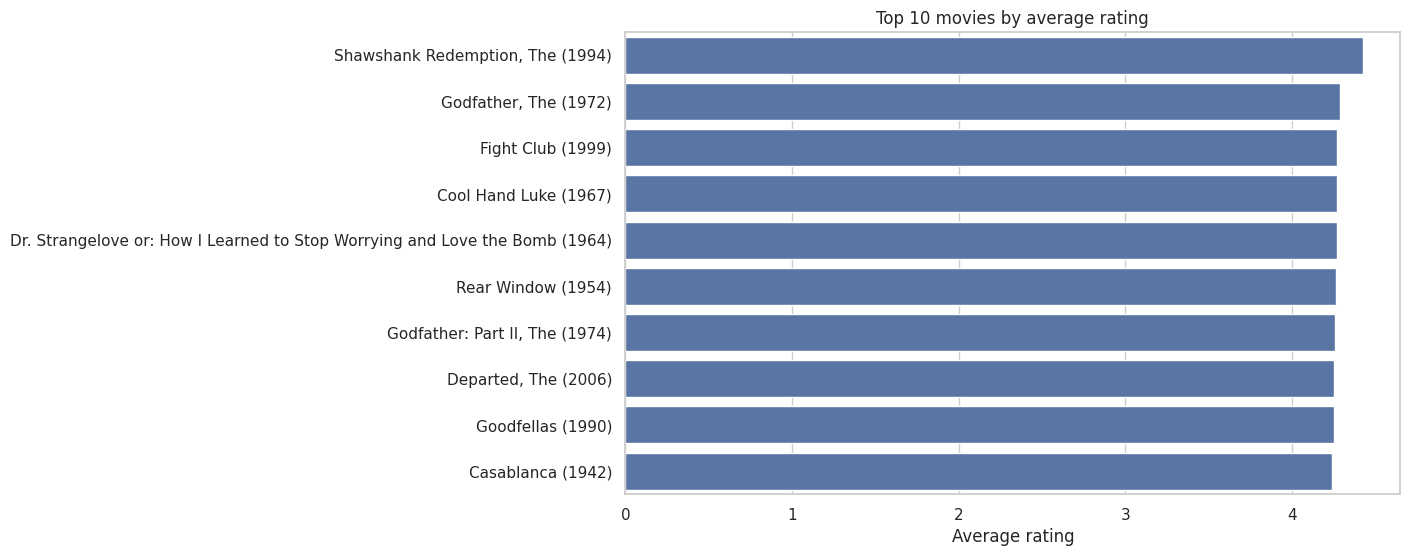

In [22]:
movie_stats=(data.groupby("title")
.agg(avg_rating=("rating","mean"),
     rating_count=("rating","count"))
.reset_index())

pop_movies=movie_stats[movie_stats["rating_count"]>=50]
top10=pop_movies.sort_values("avg_rating",ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top10,x="avg_rating",y="title")
plt.title("Top 10 movies by average rating")
plt.xlabel("Average rating")
plt.ylabel("")
plt.show()

3.Average rating by genre

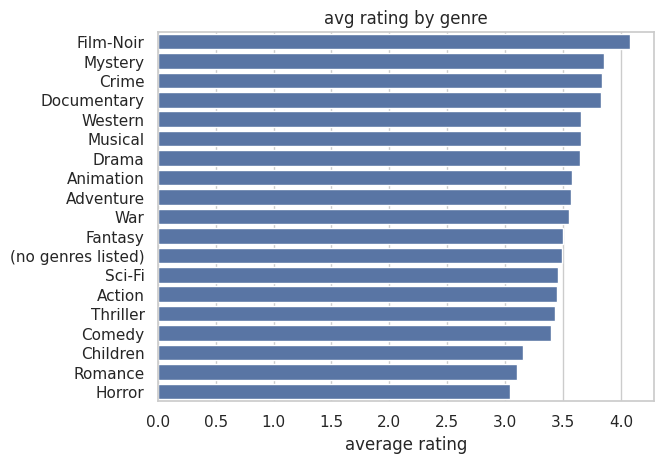

In [ ]:
data["main_genre"]=data["genres"].str.split("|").str[0]
genre_stats=(data.groupby("main_genre")["rating"].mean()

.sort_values(ascending=False).reset_index())


sns.barplot(x="rating",y="main_genre",data=genre_stats)
plt.title("avg rating by genre")
plt.xlabel("average rating")
plt.ylabel("")
plt.show()









4.number of ratings per year

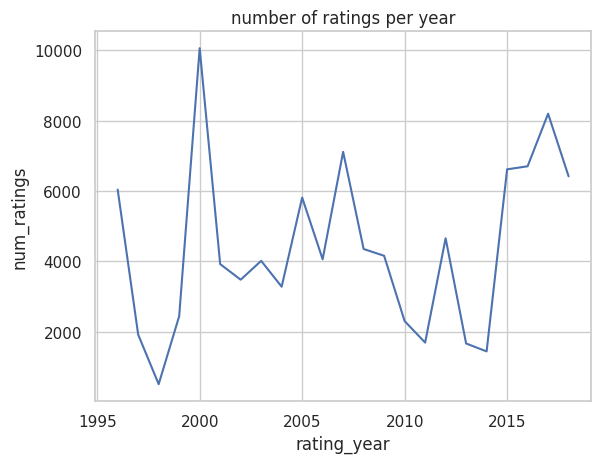

In [ ]:
ratings_per_year=(data.groupby("rating_year")["rating"].count()
.reset_index(name="num_ratings"))



sns.lineplot(x="rating_year",y="num_ratings",data=ratings_per_year)
plt.title("number of ratings per year")
plt.show()

In [ ]:
### Rating distribution


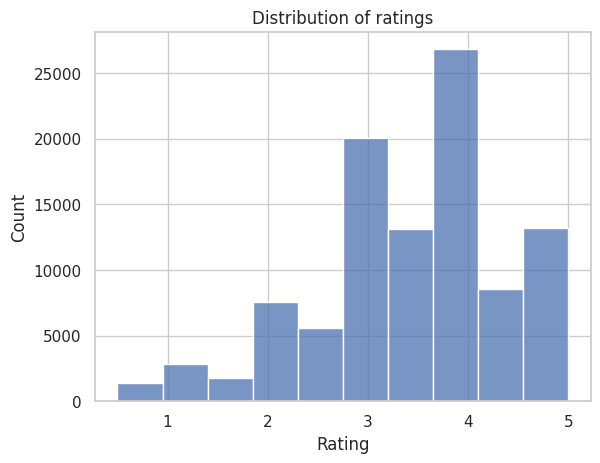

In [ ]:
sns.histplot(data["rating"], bins=10)
plt.title("Distribution of ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


key insight

In [ ]:


- The most highly rated movies (with at least 50 ratings) include several classic titles with average ratings above 4.2.​

- Rating activity increases strongly after the mid‑1990s, showing more users or more movies being rated in later years.​

- Some genres have slightly higher average ratings than others, which can be seen in the genre bar chart.

conclusion

In [ ]:
This beginner-friendly project shows:

Basic data loading

Data cleaning

Visualizations

Finding patterns in ratings